## k-space energy distribution
[Reference](https://www.ncbi.nlm.nih.gov/pubmed/16480898)

### Loading julia packages

In [1]:
push!(LOAD_PATH,"library");
#addprocs(Sys.CPU_CORES-nprocs());
using myFun
using PyPlot
#nprocs()

### We will acquire 2D gradient-echo imaging data from a phantom, comprising 3 compartments:
![phantom](phantoms/phantom.jpg)


### We need to specify the following physical properties: 
* $T_2^*$ value for M1
* $T_2^*$ value for M2
* $T_2^*$ value for M3
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M2
* Frequency gradient value (e.g., due to susceptibility effect: [$\frac{\Delta \omega}{x}$,$\frac{\Delta \omega}{y}$] in Hz/mm) for M3

In [2]:
T2valueForM1 = Float64(80e-3) # 80 msec
T2valueForM2 = Float64(80e-3) # 40 msec
T2valueForM3 = Float64(150e-3) # 150 msec
FrequencyGradientForM2 = [Float64(-4.5), Float64(0.)] # [Hz/mm along x-direction, Hz/mm along y-direction]
FrequencyGradientForM3 = [Float64(0.), Float64(-4.)]; # [Hz/mm along x-direction, Hz/mm along y-direction]

### We also need to choose the following MRI scan parameters:
* Field of view (FOV) of imaging
* Dwell time (DW) of k-space data sampling
* Echo time (TE)
* Acquisition matrix size 
* Noise intensity (arbitrary unit)

**TR** is assumed to be significantly larger than T1 in this very simple simulation that does not consider T1 effect

In [3]:
FOV = Float64(250.) # in mm
DW = Float64(50e-6) # hard-coded for now
matrixSizeX = Int64(64) # should be integer: 32, 64, 96 or 128
matrixSizeY = Int64(64) # should be integer: 32, 64, 96 or 128
TE = Float64(60e-3) # 60 msec: The minimal value allowed is about 20 msec.
NoiseLevel = Float64(1000.); # arbitrary unit: between 0 and 100000: you can start with 2000

### Data Acquisition and image reconstruction

In [62]:
# this may take 1 min to run
@time kSpaceData1 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyGradientForM2,FrequencyGradientForM3,FOV,DW,matrixSizeX,matrixSizeY,TE,NoiseLevel);
data1 = fftshift(fft(fftshift(kSpaceData1)));
println(size(kSpaceData1))
print(length(kSpaceData1))

  8.845524 seconds (212.71 k allocations: 3.053 GiB, 1.91% gc time)
(64, 64)
4096

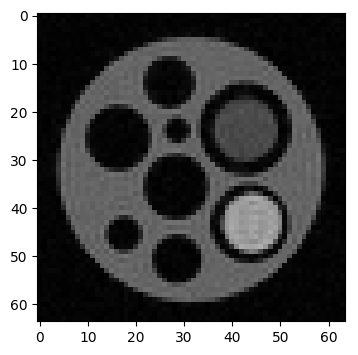

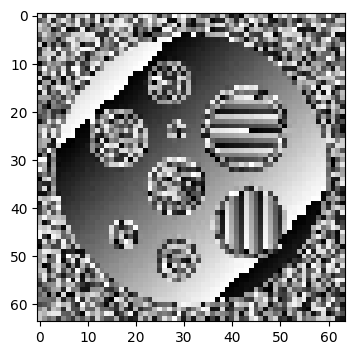

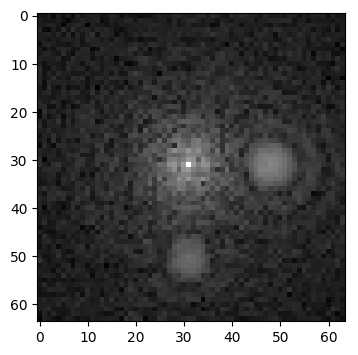

In [5]:
figure(1); figure(figsize=(4,4));imshow(abs.(data1),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(angle.(data1),cmap="gray", interpolation="none");
figure(3); figure(figsize=(4,4));imshow(abs.(kSpaceData1).^0.3,cmap="gray", interpolation="none");


### Zero-filling part of the k-space data

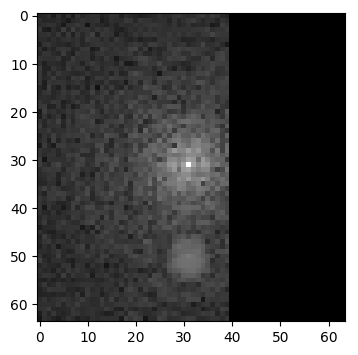

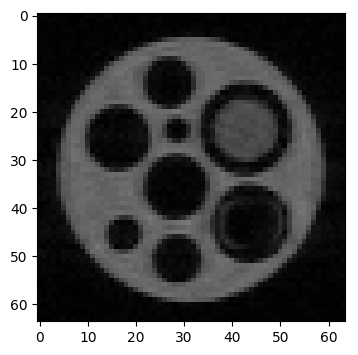

In [6]:
kSpaceData2 = deepcopy(kSpaceData1)
kSpaceData2[:,41:end]=0.
data2 = fftshift(fft(fftshift(kSpaceData2)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData2).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data2),cmap="gray", interpolation="none",vmin=0,vmax=5e6);

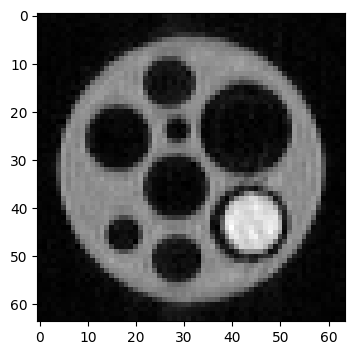

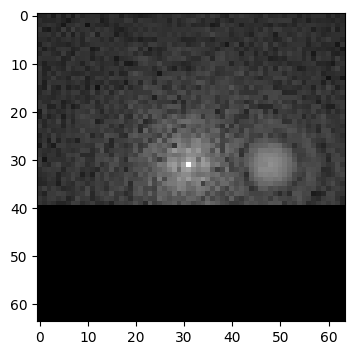

In [7]:
kSpaceData3 = deepcopy(kSpaceData1)
kSpaceData3[41:end,:]=0.
data3 = fftshift(fft(fftshift(kSpaceData3)));
figure(1); figure(figsize=(4,4));imshow(abs.(data3),cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData3).^0.3,cmap="gray", interpolation="none");

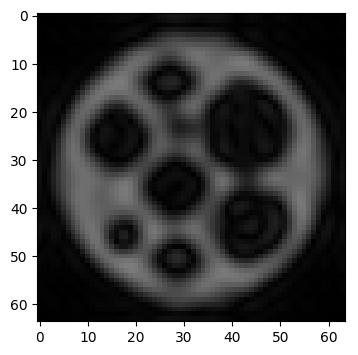

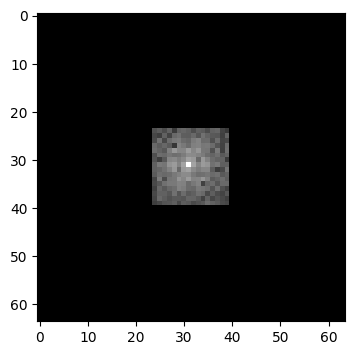

In [8]:
kSpaceData4 = deepcopy(kSpaceData1)
kSpaceData4[1:24,:]=0.
kSpaceData4[41:end,:]=0.
kSpaceData4[:,1:24]=0.
kSpaceData4[:,41:end]=0.
data4 = fftshift(fft(fftshift(kSpaceData4)));
figure(1); figure(figsize=(4,4));imshow(abs.(data4),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData4).^0.3,cmap="gray", interpolation="none");

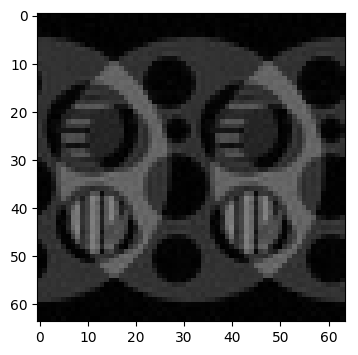

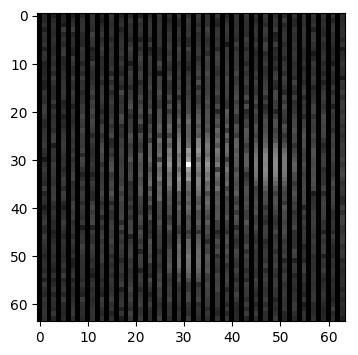

In [21]:
kSpaceData5 = deepcopy(kSpaceData1)
kSpaceData5[:,1:2:end]=0.
data5 = fftshift(fft(fftshift(kSpaceData5)));
figure(1); figure(figsize=(4,4));imshow(abs.(data5),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData5).^0.3,cmap="gray", interpolation="none");

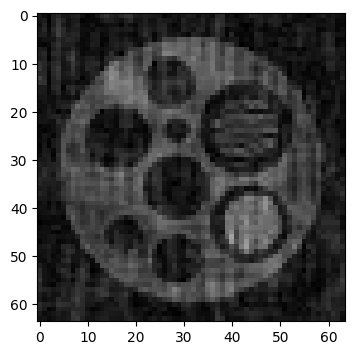

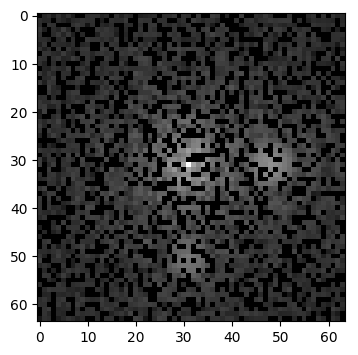

In [10]:
kSpaceData6 = deepcopy(kSpaceData1)
L = randperm(length(kSpaceData6[:]))
L2 = L[1:Int64(round(length(kSpaceData6[:])/3))]
kSpaceData6[L2]=0;
data6 = fftshift(fft(fftshift(kSpaceData6)));
figure(1); figure(figsize=(4,4));imshow(abs.(data6),cmap="gray", interpolation="none",vmin=0,vmax=5e6);
figure(2); figure(figsize=(4,4));imshow(abs.(kSpaceData6).^0.3,cmap="gray", interpolation="none");

## Homework (Feb 7th 2018)
1. Reconstruct images from k-space data that have only high spatial-frequency information
2. Reconstruct images from k-space data that only have 25% of the data, with only $k_y$ lines 1,5,9,13... $\ne$ 0 
3. Simulate motion artifact (optional)
4. Write a one-page proposal for your research project

##### Image with only high spatial-frequency information

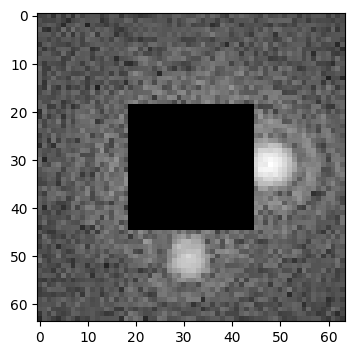

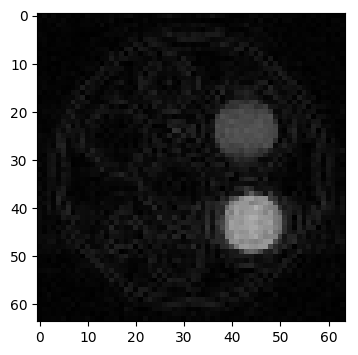

In [11]:
#Removed a good chunk of k-space data from the center
kSpaceData7 = deepcopy(kSpaceData1)
kSpaceData7[20:45,20:45]=0.
data7 = fftshift(fft(fftshift(kSpaceData7)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData7).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data7),cmap="gray", interpolation="none",vmin=0,vmax=5e6);

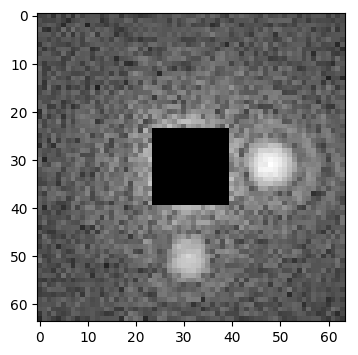

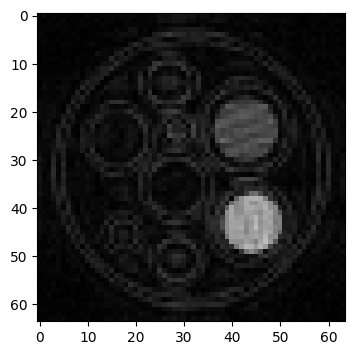

In [12]:
#We replaced a little more of the chunk we took out of the center of the k-space data
kSpaceData8 = deepcopy(kSpaceData1)
kSpaceData8[25:40,25:40]=0.
data8 = fftshift(fft(fftshift(kSpaceData8)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData8).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data8),cmap="gray", interpolation="none",vmin=0,vmax=5e6);

Note that when we only have "higher freqeuency" k-space information (all "lower" frequency in the center of the 2D k-space), we see that the higher frequency k-space corresponds to the edges of materially distinct structures (the white outline or edges seen in the reconstructed image). The more lower frequency k-space information you have, the more detail you build around the edges. This seems to make sense because the edges of a specific structures seen (as reflected by the final image) are interfaces (transitions between one structure to the next). At these interfaces, there is, perhaps, the most heterogenenutity of macromolecule structure types and sizes relative to the more interior portions of structures. Therefore, at the edges at least, there would typically be many more dephase interactions of the transvese spins and thus more potential for larger frequency shifts from the center Larmor frequency. Also note that the M2 and M3 phantoms remain unchanged when taking out the center frequencies. This happens to be the case given this collection of phantoms because the M2 and M3 phantoms only seem to resonant with the higher frequencies shifts from the center Larmor frequency (note the two big bright blots in the unaltered k-space data).

##### Image with only 25% of the information by removing ky lines

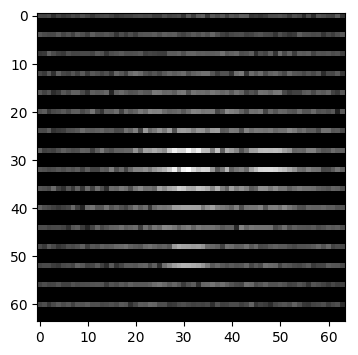

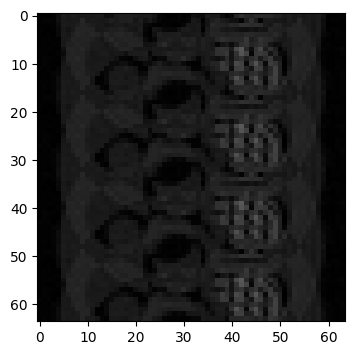

In [81]:
#we will take out every 4th row so that we only have 25% of the total k-space points remaining
kSpaceData9 = deepcopy(kSpaceData1)
kSpaceData9[1:end,:]=0.
kSpaceData9[1:4:end,:]= deepcopy(kSpaceData1[1:4:end,:])
data9 = fftshift(fft(fftshift(kSpaceData9)));
figure(1); figure(figsize=(4,4));imshow(abs.(kSpaceData9).^0.3,cmap="gray", interpolation="none");
figure(2); figure(figsize=(4,4));imshow(abs.(data9),cmap="gray", interpolation="none",vmin=0,vmax=5e6);